##Computer Vision Homework #2
#Noise, filters, corners

In [310]:
# import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Problem #1
The noise is decreased by a factor of 2 when the box filter is used to smooth the image

In [311]:
# Create 10 images with grayscale value 128
num = 10
images = 128*np.ones([256,256,num])

# Add noise to the images
sigma = 2
mean = 0
noise = sigma*np.random.randn(256,256,num) + mean
images = images+noise

In [312]:
# Signal to noise ratio
avg_image = np.mean(images,axis=2)
avg_images = np.repeat(avg_image[:, :, np.newaxis], num, axis=2)

EST_NOISE = np.sqrt( 1/(num-1)*np.sum( (avg_images-images)**2, axis=2) )
avg_EST_NOISE = np.mean(EST_NOISE)
max_EST_NOISE = np.amax(EST_NOISE)

print(avg_EST_NOISE)
print(max_EST_NOISE)

1.9479819450882243
4.097438915547051


In [313]:
# Smooth images with 3x3 box filter
images_smoothed = cv.blur(images, (3,3))
avg_image_smoothed = np.mean(images_smoothed,axis=2)
avg_images_smoothed = np.repeat(avg_image_smoothed[:, :, np.newaxis], num, axis=2)

EST_NOISE_smoothed = np.sqrt( 1/(num-1)*np.sum( (avg_images_smoothed-images_smoothed)**2, axis=2) )
avg_EST_NOISE_smoothed = np.mean(EST_NOISE_smoothed)
max_EST_NOISE_smoothed = np.amax(EST_NOISE_smoothed)

print(avg_EST_NOISE_smoothed)
print(max_EST_NOISE_smoothed)

0.6534748212454103
1.6456507754805887


#Problem #2

#Problem #3

In [314]:
img = np.array([10,10,10,10,10,40,40,40,40,40])
pad = np.hstack([0,0,img,0,0])
avg_const = 1/5*np.array([1,1,1,1,1])

output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_const.size], avg_const)
print(output)

avg_gauss = 1/10*np.array([1,2,4,2,1])
output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_gauss.size], avg_gauss)
print(output)

[ 6.  8. 10. 16. 22. 28. 34. 40. 32. 24.]
[ 7.  9. 10. 13. 19. 31. 37. 40. 36. 28.]


#Problem #4
Probability Distribution\
-100 ---> 9%\
0 ---> 42%\
100 ---> 49%

In [ ]:
r = 10000
c = 4
salt_pepper = 100*np.random.choice(np.arange(0, 2), r*c, p=[0.3, 0.7])
salt_pepper = np.reshape(salt_pepper, [r,c])

image = np.hstack([salt_pepper, 50*np.ones([r,1]), salt_pepper])
#plt.imshow(image)
#plt.show()

operator = np.array([-1,2,-1])
operator = np.reshape(operator,[1,3])
output = cv.filter2D(image, -1, operator)
#plt.imshow(output)
#plt.show()

line = output[:,c]
#plt.hist(line, [-100, 0, 100, 200])
#plt.show()

# Operator input possilibities
options = np.array([[0, 50, 0],
           [0, 50, 100],
           [100, 50, 0],
           [100, 50, 100]])
print(options)

# Operator output possibilities
print(np.sum(operator*options,axis=1))

# Probabilities
chances = np.array([0.3**2, 0.3*0.7, 0.7*0.3, 0.7**2])
print(chances)

# Total Prob
total = np.sum(0.3**2+2*0.3*0.7+0.7**2)
print(total)

one = sum(line==100)/line.size
zero = sum(line==0)/line.size
negone = sum(line==-100)/line.size
print("Chances of 100 are: ", one)
print("Chances of 0 are: ", zero)
print("Chances of -100 are: ", negone)

[[  0  50   0]
 [  0  50 100]
 [100  50   0]
 [100  50 100]]
[ 100    0    0 -100]
[0.09 0.21 0.21 0.49]
1.0
Chances of 100 are:  0.0902
Chances of 0 are:  0.4201
Chances of -100 are:  0.4897


#Problem #5

In [323]:
fxy = np.zeros([8,8])
for i in range(8):
  for j in range(8):
    fxy[i,j] = abs(i-j)

fxy = np.hstack((np.zeros([fxy.shape[0],2]), fxy, np.zeros([fxy.shape[0],2])))
fxy = np.vstack((np.zeros([2,fxy.shape[1]]), fxy, np.zeros([2,fxy.shape[1]])))
fxy = np.uint8(fxy)
fxy_med = cv.medianBlur(fxy,3)

print(fxy_med[2:-2,2:-2])

[[0 0 1 2 3 4 5 0]
 [0 1 1 2 3 4 5 5]
 [1 1 1 1 2 3 4 4]
 [2 2 1 1 1 2 3 3]
 [3 3 2 1 1 1 2 2]
 [4 4 3 2 1 1 1 1]
 [5 5 4 3 2 1 1 0]
 [0 5 4 3 2 1 0 0]]


#Problem #6

In [338]:
img = np.array([4,4,4,4,8,8,8,8])
pad = np.hstack([0,img,0])
avg_const = 1/5*np.array([1,1,1])

pad = np.uint8(pad)
output = cv.medianBlur(pad,3)
output = np.transpose(output[1:-1])
print(output)

avg_gauss = 1/4*np.array([1,2,1])
output = np.zeros(img.shape)
for i in range(img.size):
  output[i] = np.dot(pad[i:i+avg_gauss.size], avg_gauss)
print(output)

[[4 4 4 4 8 8 8 8]]
[3. 4. 4. 5. 7. 8. 8. 6.]


#Problem #7

[[0. 1. 2. 3. 4. 5. 6. 7.]
 [1. 0. 1. 2. 3. 4. 5. 6.]
 [2. 1. 0. 1. 2. 3. 4. 5.]
 [3. 2. 1. 0. 1. 2. 3. 4.]
 [4. 3. 2. 1. 0. 1. 2. 3.]
 [5. 4. 3. 2. 1. 0. 1. 2.]
 [6. 5. 4. 3. 2. 1. 0. 1.]
 [7. 6. 5. 4. 3. 2. 1. 0.]]


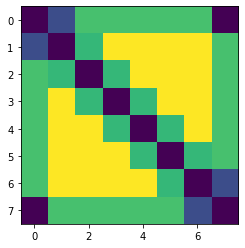

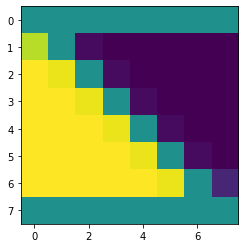

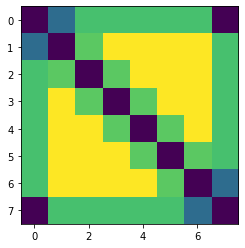

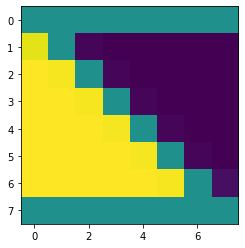

In [ ]:
idx = 8
fxy = np.zeros([idx,idx])
for i in range(idx):
  for j in range(idx):
    fxy[i,j] = i-j
fxy = np.abs(fxy)
print(fxy)

Prewittx = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
Prewitty = np.array([[-1,-1,-1],
                    [0,0,0],
                    [1,1,1]])
Px = cv.filter2D(fxy,-1,Prewittx)
Py = cv.filter2D(fxy,-1,Prewitty)

mag = np.sqrt(Px**2+Py**2)
theta = np.arctan(Py,Px)

plt.imshow(mag)
plt.show()
plt.imshow(theta)
plt.show()

Sx = cv.Sobel(fxy,cv.CV_64F,1,0,ksize=3)
Sy = cv.Sobel(fxy,cv.CV_64F,0,1,ksize=3)

mag = np.sqrt(Sx**2+Sy**2)
theta = np.arctan(Sy,Sx)

plt.imshow(mag)
plt.show()
plt.imshow(theta)
plt.show()

#Problem #8

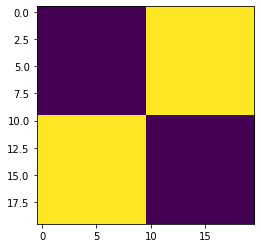

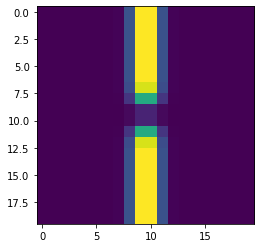

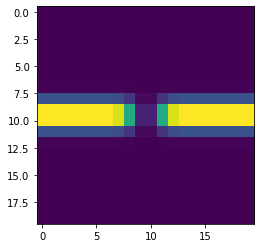

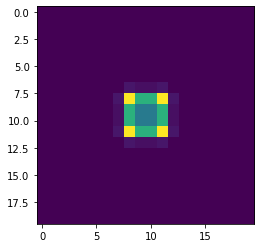

In [334]:
image = np.hstack([np.zeros([10,10]), 40*np.ones([10,10])])
checker = np.vstack([image, np.fliplr(image)])
plt.imshow(checker)
plt.show()

Sx = cv.Sobel(checker,cv.CV_64F,1,0,ksize=7)
Sy = cv.Sobel(checker,cv.CV_64F,0,1,ksize=7)

R = (Sx**2 * Sy**2) - 0.05*(Sx**2 + Sy**2)
plt.imshow(Sx**2)
plt.show()
plt.imshow(Sy**2)
plt.show()
plt.imshow(R)
plt.show()
